<a href="https://colab.research.google.com/github/JunpengWen/CSI4106/blob/main/CSI4106_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT 2 - EMPIRICAL STUDY OF Naïve Bayes vs Logistic Regression**

**1. Group Description**

Group Number: 53 \\
Member1 Names: Junpeng Wen \\
Member1 Student Numbers: 300249282 \\
Member2 Names: Yongquan Long \\
Member2 Student Numbers: 300249549 \\

**2. Naïve Bayes vs Logistic Regression**

Naïve Bayes and Logistic Regression are two predominant algorithms employed in the realm of machine learning for classification tasks, each embodying unique attributes and functionalities.

Naïve Bayes, a probabilistic algorithm, operates on the principle of feature independence given the class label. This method is particularly proficient in handling multi-class classification tasks and is advantageous in scenarios where the availability of training data is limited. However, its performance may be compromised when the assumption of feature independence is not upheld. On the other hand, Logistic Regression, which falls under the category of discriminative models, is utilized to ascertain the probability of class membership, thereby delineating a linear decision boundary. This algorithm is commendably resilient in the presence of noisy data. Nonetheless, it is susceptible to overfitting, particularly when applied to small datasets that are characterized by a plethora of features.

The decision to opt for either Naïve Bayes or Logistic Regression is contingent upon various factors including the nature of the task at hand, the characteristics inherent to the dataset, as well as the significance accorded to model interpretability and computational efficiency in the specific context.

**3. Dataset**

The dataset from the UC Irvine Machine Learning Repository(https://archive.ics.uci.edu/dataset/863/maternal+health+risk), specifically focusing on maternal health risk, presents a valuable opportunity for researchers and practitioners to engage in comprehensive analysis and experimentation with various machine learning algorithms. This dataset encompasses a range of variables that are crucial in determining the health risks associated with pregnancy, offering insights into important patterns and correlations. Utilizing this dataset enables the development and validation of predictive models, such as Naïve Bayes and Logistic Regression, to enhance the understanding and management of maternal health risks. The accessibility and richness of this dataset make it a significant resource for advancing knowledge in maternal healthcare, and promoting the adoption of data-driven approaches in medical settings.

**Import important libraries**

In [28]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

**Read Dataset**

As outlined in the project description, it should be possible for the correctors to execute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, you can upload it to a public GitHub repository and provide a link to the raw version of the dataset.
GitHub repository：

https://github.com/JunpengWen/CSI4106

The link to the raw version is as follows:

https://raw.githubusercontent.com/JunpengWen/CSI4106/main/Maternal%20Health%20Risk%20Data%20Set.csv


Now provide the link to YOUR dataset and read the dataset using pandas:

In [29]:
url = "https://raw.githubusercontent.com/JunpengWen/CSI4106/main/Maternal%20Health%20Risk%20Data%20Set.csv" #provide the link to the raw version of dataset. You *need* to provide a link to *your own* github repository. DO NOT use the link that is provided as an example.

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [30]:
dataset.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

The dataset columns include 'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', and 'RiskLevel', which are health-related attributes.

Now let's see the first 10 entries (rows):

In [31]:
dataset.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


**Preprocessing Step**

In most data science projects, preprocessing is a foundational step that involves preparing and cleaning the raw data before it is used for analysis or modeling. This ensures that the data is of good quality and that any inconsistencies or inaccuracies are addressed.


The first part of the preprocessing is to ascertain if the dataset has any missing values. Handling missing values is crucial because they can adversely affect the results of data analysis or modeling.



In [32]:
missing_values = dataset.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In the dataset, a column named "RiskLevel" categorizes maternal health risks into three categories: 'low risk', 'mid risk', and 'high risk'. These descriptive labels are useful, but many machine-learning algorithms require numeric input. As a result, categorical variables are commonly converted to numeric variables.

In [33]:
# Define a mapping dictionary
risk_level_mapping = {'low risk': 0 , 'mid risk': 1 , 'high risk': 2 }

# Map the numeric values to their corresponding risk levels
dataset['RiskLevel'] = dataset['RiskLevel'].map(risk_level_mapping)

# Show the updated dataset
print(dataset.head())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86          2
1   35         140           90  13.0      98.0         70          2
2   29          90           70   8.0     100.0         80          2
3   30         140           85   7.0      98.0         70          2
4   35         120           60   6.1      98.0         76          0


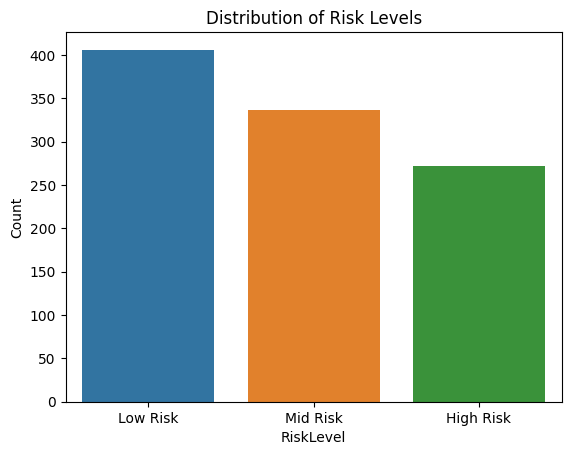

In [34]:
# Create a bar plot of 'RiskLevel' value counts
sns.countplot(x='RiskLevel', data=dataset)

# Set the title and labels of the plot
plt.title('Distribution of Risk Levels')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2], labels=['Low Risk', 'Mid Risk', 'High Risk'])

# Display the plot
plt.show()

Analyzing complex data requires first understanding the basic landscape of the data. By determining the minimum, maximum, and range of dataset values, we can extract fundamental data insights that will assist in future preprocessing and modeling.

In [35]:
# Get the minimum value and maximum value for each column in the dataset
min_values = dataset.min()
max_values = dataset.max()

# Create a DataFrame to show the minimum and maximum values side-by-side for each feature
domains = pd.DataFrame({'Min Value': min_values, 'Max Value': max_values})
print(domains)

# Compute the range (difference between max and min) for each column
ranges = dataset.max() - dataset.min()
print(ranges)

             Min Value  Max Value
Age               10.0       70.0
SystolicBP        70.0      160.0
DiastolicBP       49.0      100.0
BS                 6.0       19.0
BodyTemp          98.0      103.0
HeartRate          7.0       90.0
RiskLevel          0.0        2.0
Age            60.0
SystolicBP     90.0
DiastolicBP    51.0
BS             13.0
BodyTemp        5.0
HeartRate      83.0
RiskLevel       2.0
dtype: float64


The next step is to split a dataset into separate training and testing subsets. In data analysis and machine learning, this is a common practice to ensure the model does not only fit the data it has seen but also performs well on unseen data. In this way, the generalization capability of the model can be assessed.

In [36]:
# Splitting the dataset into training and testing sets
X = dataset.drop('RiskLevel', axis=1)  # Features (excluding the 'RiskLevel' column)
y = dataset['RiskLevel']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shape of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (811, 6)
Shape of X_test: (203, 6)
Shape of y_train: (811,)
Shape of y_test: (203,)


Normalizing attributes ensures consistent scales, enhancing data analysis and machine learning.Using Min-Max scaling, dataset attributes are transformed to a [0, 1] range.  The data is automatically normalized and returned as a DataFrame using MinMaxScaler from sklearn.preprocessing.

In [37]:
# Initialize a scaler
scaler = MinMaxScaler()

# Fit and transform the dataset to normalize it
normalized_dataset = scaler.fit_transform(dataset)

# Convert the normalized array back to a DataFrame
normalized_df = pd.DataFrame(normalized_dataset, columns=dataset.columns)

print(normalized_df.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0  0.250000    0.666667     0.607843  0.692308       0.0   0.951807        1.0
1  0.416667    0.777778     0.803922  0.538462       0.0   0.759036        1.0
2  0.316667    0.222222     0.411765  0.153846       0.4   0.879518        1.0
3  0.333333    0.777778     0.705882  0.076923       0.0   0.759036        1.0
4  0.416667    0.555556     0.215686  0.007692       0.0   0.831325        0.0


In the preprocessing phase, we have carefully addressed the critical steps needed to prepare our data for advanced analytics and modelling. From handling missing values to converting categorical labels to numerical ones, to visually displaying the distribution, we have put a solid foundation in place. We ensure that our dataset is not only kept intact but also primed for further analysis using this thorough approach.


--------------------------------------------------------------------------


**4. Training a Gaussian Naive Bayes Classifier**

The Gaussian Naive Bayes classifier (GNB) is a variant of the Naive Bayes classifier designed for continuous data. The data from each label is assumed to be drawn from a simple Gaussian distribution.

Using the training datasets (X_train and Y_train), train the classifier. Once trained, use the model to predict the test data (X_test). Evaluate the classifier's performance using various metrics. Accuracy measures the proportion of correctly predicted classifications. Each class's classification report provides metrics such as precision, recall, and f1-score. In the confusion matrix, actual classifications are compared with predicted classifications, showing the performance of the classifier.

Accuracy: 57.64%

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.91      0.66        80
           1       0.56      0.18      0.28        76
           2       0.79      0.64      0.71        47

    accuracy                           0.58       203
   macro avg       0.62      0.58      0.55       203
weighted avg       0.60      0.58      0.53       203



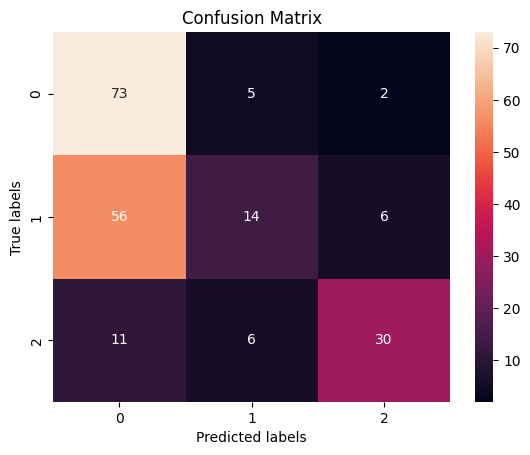

In [38]:
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict using the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

--------------------------------------------------------------------------


**5. Train/test/evaluate 2 models in cross-validation**

The cross-validation method is used to estimate a model's performance. Rather than dividing the dataset into training and test parts, it is divided into 'k' number of folds subsets. 'K-1' folds are used to train the model and the remaining folds are used to test it. It is repeated 'k' times with each fold being used exactly once as a test set. In order to produce a single value, the overall performance metric is averaged over 'k' test sets. Especially on small datasets, cross-validation provides a better estimate of model performance since each observation is used both for training and testing.

Firstly, ensure that we have our dataset loaded and separated into features (X) and target variable (y).


In [39]:
data = load_iris()
X, y = data.data, data.target

Here, the Gaussian Naive Bayes classifier is being set up and initialized. This classifier is particularly suited for datasets where the features are normally distributed. The core of the code involves using the cross_val_predict function:

In [40]:
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Use cross_val_predict to get the predicted values for each fold
y_pred = cross_val_predict(gnb, X, y, cv=4)

In this section, we calculate precision and recall to evaluate the model's performance. Precision and recall are calculated using the precision_score and recall_score functions from Scikit-learn. A micro average and a macro average are computed:

In [41]:
# Calculate precision and recall for micro average
precision_micro = precision_score(y, y_pred, average='micro')
recall_micro = recall_score(y, y_pred, average='micro')

# Calculate precision and recall for macro average
precision_macro = precision_score(y, y_pred, average='macro')
recall_macro = recall_score(y, y_pred, average='macro')

print(f"Micro-average Precision: {precision_micro * 100:.2f}%")
print(f"Micro-average Recall: {recall_micro * 100:.2f}%")
print(f"Macro-average Precision: {precision_macro * 100:.2f}%")
print(f"Macro-average Recall: {recall_macro * 100:.2f}%")


Micro-average Precision: 95.33%
Micro-average Recall: 95.33%
Macro-average Precision: 95.34%
Macro-average Recall: 95.33%


Cross-validation offers a more robust way to evaluate model performance. Both micro and macro precision and recall scores were above 95% for the Gaussian Naive Bayes classifier on the Iris dataset. Moreover, as can be seen from the class distribution, the Iris dataset is balanced with equal numbers of samples from each class. Due to this balance, the micro-average and macro-average values will be close, as observed in the results. This ensures that the model is not biased towards any one class due to the balance in the dataset.

**9. Conclusion**

Comment on the empirical study, its results, and give ideas for future work.

--------------------------------------------------------------------------


**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".

**10 References**

https://archive.ics.uci.edu/dataset/863/maternal+health+risk

https://www.tutorialspoint.com/scikit_learn/index.htm

https://www.youtube.com/watch?v=0Lt9w-BxKFQ

https://www.datacamp.com/tutorial/understanding-logistic-regression-python

https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
